In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from keras import Sequential
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score


### Load and Preprocess Cancer Dataset

This code loads the dataset, drops irrelevant columns, and maps the diagnosis labels:
- `'M'` to `1` (Malignant)
- `'B'` to `0` (Benign)

In [3]:
df = pd.read_csv("D:/Web_learning/js_Elzero/canser/data.csv")
df = df.drop(['Unnamed: 32', 'id'], axis=1)
df['diagnosis'] = df['diagnosis'].map({'M': 1 , 'B': 0})

### Displaying the First Rows and Checking for Missing Values

- `df.head()` shows the first five rows of the dataset.
- `df.isnull().sum()` checks for missing values in each column.


In [7]:
print(df.head())
print(df.isnull().sum())  


   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

### Sorted Correlation with Target Variable

This code computes and displays the correlation of all numerical features with the target variable (`diagnosis`), sorted from highest to lowest.


In [ ]:

correlation_with_target = df.corr(numeric_only=True)['diagnosis'].sort_values(ascending=False)

print(correlation_with_target)


diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

### Feature Selection and Target Definition

We select the most relevant features based on their correlation with the target variable `diagnosis`, and define:
- `X` as the feature matrix (selected features)
- `y` as the target vector (`diagn


In [19]:
sf = [
    'radius_mean',              
    'perimeter_mean',     
    'area_mean',                
    'concavity_mean',       
    'concave points_mean',  
    'radius_worst',         
    'perimeter_worst',
    'area_worst',           
    'concave points_worst'  
] 

X= df[sf]
y = df['diagnosis']

### Model Training and Evaluation with Different SVM Kernels

We scale the features, split the data into training and test sets, and evaluate the performance of a Support Vector Machine (SVM) with different kernels: 
- `linear`
- `poly` 
- `rbf`
- `sigmoid`

For each kernel, we calculate and display the accuracy, confusion matrix, and classification report.


In [13]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)



kernels = ['linear', 'poly', 'rbf','sigmoid']
for kernel in kernels:
    svm = SVC(kernel=kernel, probability=True)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    
    print(f"\nKernel: {kernel}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))




Kernel: linear
Accuracy: 0.9766081871345029
Confusion Matrix:
 [[107   1]
 [  3  60]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171


Kernel: poly
Accuracy: 0.8947368421052632
Confusion Matrix:
 [[108   0]
 [ 18  45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       108
           1       1.00      0.71      0.83        63

    accuracy                           0.89       171
   macro avg       0.93      0.86      0.88       171
weighted avg       0.91      0.89      0.89       171


Kernel: rbf
Accuracy: 0.9532163742690059
Confusion Matrix:
 [[106   2]
 [  6  57]]
Classification Report:
               prec

### Hyperparameter Tuning for MLP Classifier

We use **GridSearchCV** to tune the `alpha` hyperparameter of the **MLPClassifier** (Multi-layer Perceptron), performing cross-validation with 5 folds. The model is then trained with the best parameter found.

We define and initialize several MLP models with different network architectures and activation functions:
- Simple model with 10 neurons and `Sigmoid`
- Deep model with 64-32-16 neurons and `Sigmoid`
- Simple model with 10 neurons and `ReLU`
- Deep model with 64-32-16 neurons and `ReLU`


In [14]:


param_grid = {
    'alpha': [0.0001, 0.001, 0.01],  
}

grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)

print(f"\nBest Parameters: {grid_search.best_params_}")
aplha=grid_search.best_params_['alpha']

models = {
    "Simple (10 neurons, Sigmoid)": MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', max_iter=1000, random_state=42, learning_rate_init=aplha),
    "Deep (64-32-16 neurons, Sigmoid)": MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation='logistic', max_iter=1000, random_state=42, learning_rate_init=aplha),
    "Simple (10 neurons, ReLU)": MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000, random_state=42, learning_rate_init=aplha),
    "Deep (64-32-16 neurons, ReLU)": MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation='relu', max_iter=1000, random_state=42, learning_rate_init=aplha),
}


Fitting 5 folds for each of 3 candidates, totalling 15 fits

Best Parameters: {'alpha': 0.001}


d:\Web_learning\js_Elzero\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Training and Evaluating MLP Models

We train each MLP model defined earlier and evaluate them on the test set. For each model:
- Accuracy and classification report are printed.
- 5-fold cross-validation is performed using the full scaled dataset.
- Mean cross-validation accuracy is also reported.


In [17]:

results = {}

for name, model in models.items():
    print(f"\nTraining model: {name}")
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    print(f"Cross-validation scores (5-fold): {cv_scores}")
    print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")


Training model: Simple (10 neurons, Sigmoid)
Accuracy: 0.9415
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       108
           1       0.93      0.90      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

Cross-validation scores (5-fold): [0.90350877 0.94736842 0.95614035 0.95614035 0.96460177]
Mean cross-validation accuracy: 0.9456

Training model: Deep (64-32-16 neurons, Sigmoid)
Accuracy: 0.9708
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

Cross-validation scores (5-fold): [0.921

### Visualizing Loss Curves of MLP Models

Each MLP model's training loss curve is plotted to observe convergence behavior across epochs. This helps us evaluate:
- How well each model is learning.
- Whether the models are underfitting or overfitting.


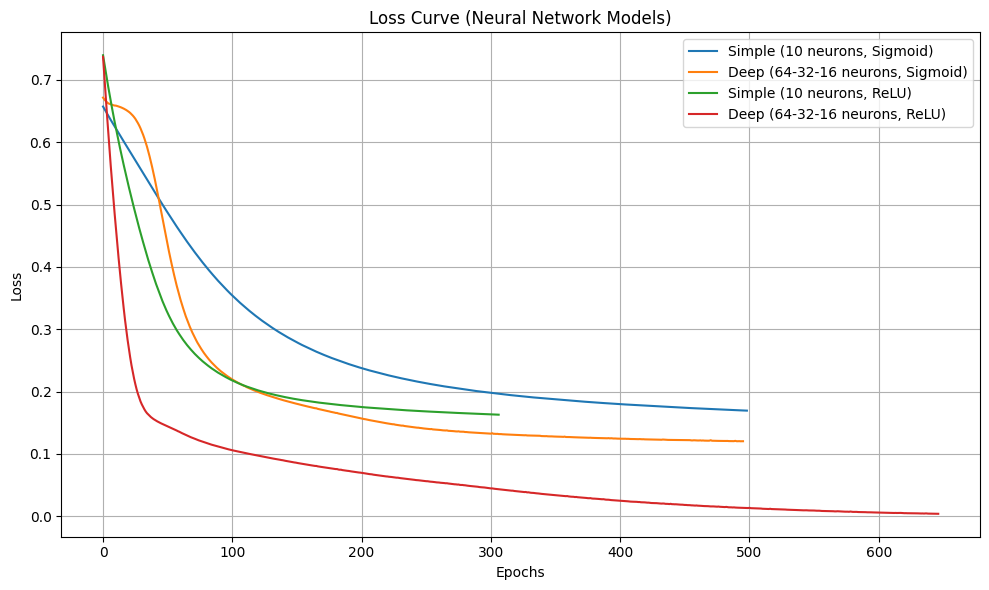

In [18]:


plt.figure(figsize=(10, 6))

for name, model in models.items():
    model.fit(X_train, y_train)
    plt.plot(model.loss_curve_, label=name)

plt.title("Loss Curve (Neural Network Models)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
